# Datamining for OSEL Regulatory Science Programmatic Planning

#### This project involves the use of data mining techniques to support regulatory science initiatives within OSEL with a strong emphasis on planning and strategic implementation. The goal is to pinpoint regulatory science gaps and find potential research collaborators. Pubmed is the target database to do the webscraping to get the dataset

## Inferior Vena Cava Dataset Analysis

In [39]:
import pandas as pd

# Path to the Excel file
file_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\FDA_Datasets\IVC.xlsx'

# Load the dataset
df = pd.read_excel(file_path)

# Print the first few rows of the DataFrame to confirm it's loaded correctly
print(df.head())

                                               Title  \
0  Design and evaluation of a novel biodegradable...   
1  Hemodynamics of neonatal double lumen cannula ...   
2  Mechanical behavior and blood compatibility of...   
3  Dual-Propeller Cavopulmonary Pump for Assistin...   
4  Patient-Specific Atrial Hemodynamics of a Doub...   

                                             Authors           Journal  \
0  Yang C, Ma F, Gao C, Kang Y, Zhang G, Liu P, J...   J Biomater Appl   
1  Jamil M, Rezaeimoghaddam M, Cakmak B, Yildiz Y...         Perfusion   
2        Liu H, Li J, Zhou S, Long J, Dong L, Wei G.  Biomed Mater Eng   
3                 Jagani JN, Untaroiu A, Kalaria AD.           ASAIO J   
4  Muhammad J, Rezaeimoghaddam M, Cakmak B, Rasoo...      Artif Organs   

             PMID  Publication_year  \
0  PMID: 30862277            2019.0   
1  PMID: 31580212            2020.0   
2  PMID: 26484554            2015.0   
3  PMID: 30688694            2019.0   
4  PMID: 29572879      

In [40]:
# Look at the infor of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             11 non-null     object 
 1   Authors           10 non-null     object 
 2   Journal           10 non-null     object 
 3   PMID              10 non-null     object 
 4   Publication_year  10 non-null     float64
 5   Affiliation_1     10 non-null     object 
 6   Affiliation_2     9 non-null      object 
 7   Affiliation_3     7 non-null      object 
 8   Affiliation_4     2 non-null      object 
 9   Affiliation_5     2 non-null      object 
 10  Affiliation_6     1 non-null      object 
 11  Affiliation_7     1 non-null      object 
 12  Affiliation_8     1 non-null      object 
 13  Affiliation_9     1 non-null      object 
 14  Affiliation_10    1 non-null      object 
dtypes: float64(1), object(14)
memory usage: 1.6+ KB


In [41]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Title                2
Authors              3
Journal              3
PMID                 3
Publication_year     3
Affiliation_1        3
Affiliation_2        4
Affiliation_3        6
Affiliation_4       11
Affiliation_5       11
Affiliation_6       12
Affiliation_7       12
Affiliation_8       12
Affiliation_9       12
Affiliation_10      12
dtype: int64

In [42]:
# Cleaning Titles, Authors, and Journals
df['Title'] = df['Title'].str.strip().str.lower()
df['Authors'] = df['Authors'].str.strip().str.lower()
df['Journal'] = df['Journal'].str.strip().str.lower()

# Affiliation columns are named 'Affiliation_1', 'Affiliation_2', etc.
affiliation_columns = [col for col in df.columns if 'Affiliation' in col]

# Cleaning each Affiliation column
for col in affiliation_columns:
    df[col] = df[col].str.strip().str.lower()

In [43]:
# Adding a new column 'affiliation_counts' to count the number of affiliations for each publication

affiliation_columns = [col for col in df.columns if 'Affiliation' in col]

# Counting the number of non-null affiliations for each row
df['affiliation_counts'] = df[affiliation_columns].notnull().sum(axis=1)

# Display the first few rows of the DataFrame to verify the new column
df.head()

,Title,Authors,Journal,PMID,Publication_year,Affiliation_1,Affiliation_2,Affiliation_3,Affiliation_4,Affiliation_5,Affiliation_6,Affiliation_7,Affiliation_8,Affiliation_9,Affiliation_10,affiliation_counts
0,design and evaluation of a novel biodegradable...,"yang c, ma f, gao c, kang y, zhang g, liu p, j...",j biomater appl,PMID: 30862277,2019.0,"school of materials science and engineering, u...","shanghai microport medical (group) co., ltd, s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,hemodynamics of neonatal double lumen cannula ...,"jamil m, rezaeimoghaddam m, cakmak b, yildiz y...",perfusion,PMID: 31580212,2020.0,"department of mechanical engineering, koç univ...","department of anesthesiology and reanimation, ...",department of pediatric cardiovascular surgery...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,mechanical behavior and blood compatibility of...,"liu h, li j, zhou s, long j, dong l, wei g.",biomed mater eng,PMID: 26484554,2015.0,college of materials and chemistry & chemical ...,"department of research & development, lifetech...","department of research & development, kinhely ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,dual-propeller cavopulmonary pump for assistin...,"jagani jn, untaroiu a, kalaria ad.",asaio j,PMID: 30688694,2019.0,"from the department of mechanical engineering,...",department of biomedical engineering and mecha...,"department of radiology, medstar medical group...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,patient-specific atrial hemodynamics of a doub...,"muhammad j, rezaeimoghaddam m, cakmak b, rasoo...",artif organs,PMID: 29572879,2018.0,"department of mechanical engineering, koç univ...","faculty of medicine, department of cardiovascu...","department of anesthesiology and reanimation, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


In [44]:
# Find the maximum number of affiliations
max_affiliations = df['affiliation_counts'].max()

print(f"The maximum number of affiliations is: {max_affiliations}")

The maximum number of affiliations is: 10


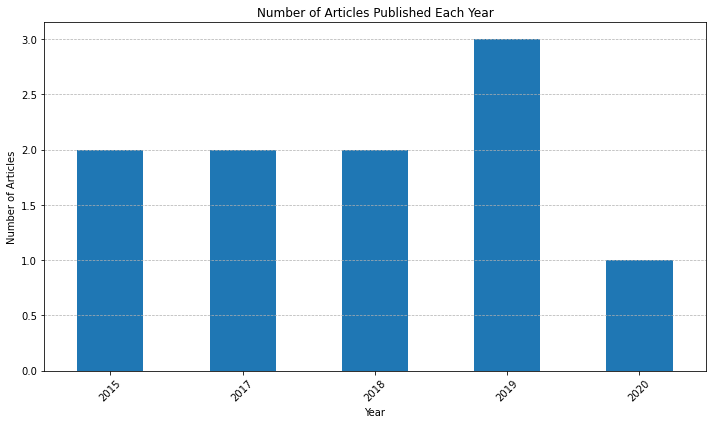

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and it has been loaded correctly

# Handle missing values by removing them
df = df.dropna(subset=['Publication_year'])

# Convert 'Publication_year' to integer
df['Publication_year'] = df['Publication_year'].astype(int)

# Filter out the placeholder year if it exists
df = df[df['Publication_year'] > 0]

# Group the data by 'Publication_year' and count the number of articles per year
articles_per_year = df.groupby('Publication_year').size()

# Plot the number of articles published each year, excluding year 0
plt.figure(figsize=(10, 6))
articles_per_year.plot(kind='bar', color='#1f77b4')
plt.title('Number of Articles Published Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


In [48]:
#Which journals are the most common for these articles?
# Most common journals in the dataset
most_common_journals = df['Journal'].value_counts().head(10)
most_common_journals

artif organs                     2
j heart lung transplant          1
biomed mater eng                 1
j pharmacol toxicol methods      1
asaio j                          1
j korean med sci                 1
perfusion                        1
j biomater appl                  1
j cardiovasc med (hagerstown)    1
Name: Journal, dtype: int64

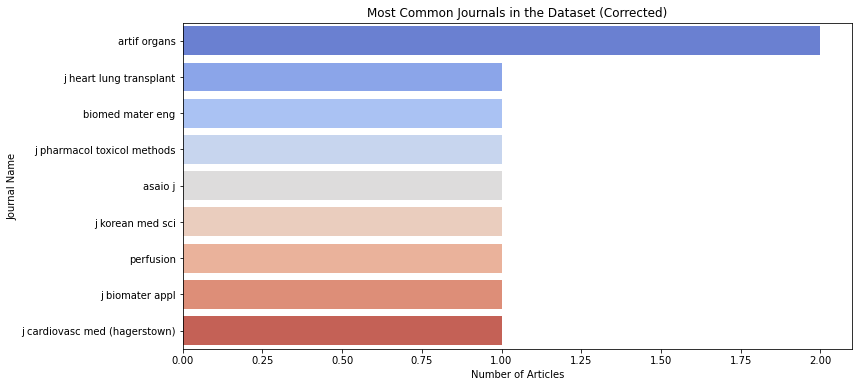

In [49]:
# Visualization to see the top ten journals

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Function to extract journal names more accurately
def extract_journal_name(text):
    # Check if the text is a string
    if isinstance(text, str):
        # Split by '.' and take the first part, which is likely the journal name
        return text.split('.')[0].strip()
    else:
        # Return a placeholder or NaN if the text is not a string
        return 'Unknown'  # or you can use: return np.nan

# Apply the function to extract journal names
df['Extracted_Journal'] = df['Journal'].apply(extract_journal_name)

# Counting the most common journals again
most_common_journals_corrected = df['Extracted_Journal'].value_counts().head(10)

# Preparing data for corrected visualization
journal_names_corrected = most_common_journals_corrected.index
journal_counts_corrected = most_common_journals_corrected.values

# Creating a DataFrame for corrected visualization
journal_df_corrected = pd.DataFrame({'Journal': journal_names_corrected, 'Count': journal_counts_corrected})

# Corrected Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Journal', data=journal_df_corrected, palette="coolwarm")
plt.title('Most Common Journals in the Dataset (Corrected)')
plt.xlabel('Number of Articles')
plt.ylabel('Journal Name')
plt.show()


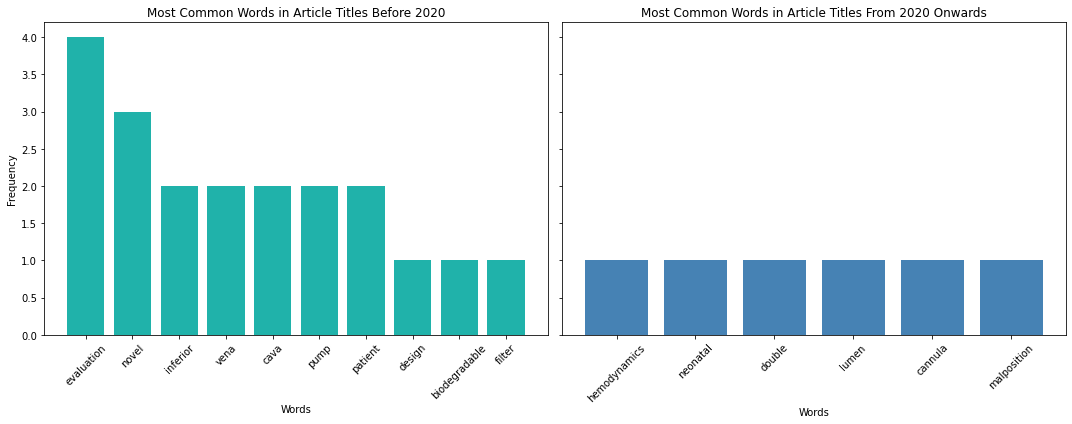

([('evaluation', 4),
  ('novel', 3),
  ('inferior', 2),
  ('vena', 2),
  ('cava', 2),
  ('pump', 2),
  ('patient', 2),
  ('design', 1),
  ('biodegradable', 1),
  ('filter', 1)],
 [('hemodynamics', 1),
  ('neonatal', 1),
  ('double', 1),
  ('lumen', 1),
  ('cannula', 1),
  ('malposition', 1)])

In [50]:
import re
from collections import Counter
import matplotlib.pyplot as plt

# Manually define a small set of common English stop words
stop_words = set(["the", "and", "of", "in", "to", "a", "with", "for", "on", "is", "an", "by", "from", "as", "at", "are", "that", "this", "which", "be", "or"])

def clean_tokenize(text):
    """ 
    Tokenize the text by converting to lowercase, removing non-alphabetic characters, 
    and splitting into words.
    """
    words = re.findall(r'\b[a-z]+\b', text.lower())
    return words

# Split the dataset into two time periods
before_2020_df = df[df['Publication_year'] < 2020]
from_2020_onwards_df = df[df['Publication_year'] >= 2020]

# Tokenize the titles and remove stop words for each period
tokens_before_2020 = [word for title in before_2020_df['Title'] for word in clean_tokenize(title) if word not in stop_words]
tokens_from_2020_onwards = [word for title in from_2020_onwards_df['Title'] for word in clean_tokenize(title) if word not in stop_words]

# Count the frequency of each word for each period
word_counts_before_2020 = Counter(tokens_before_2020)
word_counts_from_2020_onwards = Counter(tokens_from_2020_onwards)

# Get the most common words for each period
most_common_words_before_2020 = word_counts_before_2020.most_common(10)
most_common_words_from_2020_onwards = word_counts_from_2020_onwards.most_common(10)

# Plot the most common words for each period
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Before 2020
axes[0].bar(*zip(*most_common_words_before_2020), color='lightseagreen')
axes[0].set_title('Most Common Words in Article Titles Before 2020')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)

# From 2020 onwards
axes[1].bar(*zip(*most_common_words_from_2020_onwards), color='steelblue')
axes[1].set_title('Most Common Words in Article Titles From 2020 Onwards')
axes[1].set_xlabel('Words')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

(most_common_words_before_2020, most_common_words_from_2020_onwards)


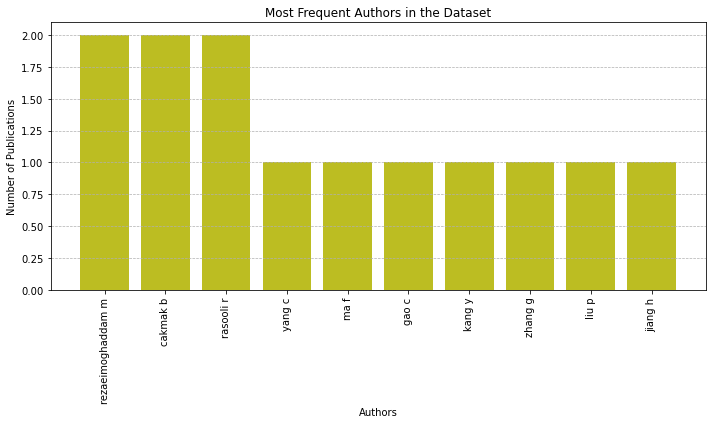

[('rezaeimoghaddam m', 2),
 ('cakmak b', 2),
 ('rasooli r', 2),
 ('yang c', 1),
 ('ma f', 1),
 ('gao c', 1),
 ('kang y', 1),
 ('zhang g', 1),
 ('liu p', 1),
 ('jiang h', 1)]

In [18]:
# Most frequent Authors

# Function to clean and split author names
def clean_split_authors(author_string):
    # Split author names by comma, assuming each author is separated by a comma
    authors = author_string.split(',')
    # Remove any leading/trailing whitespace from each author name
    authors = [author.strip() for author in authors]
    return authors

# Combine all authors into a single list
all_authors = []
for authors in df['Authors'].dropna():
    all_authors.extend(clean_split_authors(authors))

# Count the occurrences of each author
author_counts = Counter(all_authors)

# Get the most common authors
most_common_authors = author_counts.most_common(10)

# Plot the most common authors
plt.figure(figsize=(10, 6))
plt.bar(*zip(*most_common_authors), color='#bcbd22')
plt.title('Most Frequent Authors in the Dataset')
plt.xlabel('Authors')
plt.ylabel('Number of Publications')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

# Return the most common authors and their counts
most_common_authors

In [51]:
import pandas as pd
from collections import Counter
import itertools

# Correcting the splitting of the 'Authors' column using a comma as the delimiter
author_lists = df['Authors'].str.split(',').dropna().tolist()

# Initialize an empty dictionary to store collaboration pairs and their counts
collaboration_counts = {}

# Loop through each list of authors
for authors in author_lists:
    # Trim whitespace and remove any trailing periods from author names
    authors_cleaned = [author.strip().rstrip('.') for author in authors]
    # Create unique pairs of authors for each publication
    for pair in itertools.combinations(authors_cleaned, 2):
        # Sort the pair to avoid duplicates (e.g., A-B and B-A are the same collaboration)
        sorted_pair = tuple(sorted(pair))
        # Count collaborations
        collaboration_counts[sorted_pair] = collaboration_counts.get(sorted_pair, 0) + 1

# Identify the most common collaborations
most_common_collaborations = Counter(collaboration_counts).most_common(10)

most_common_collaborations

[(('cakmak b', 'rezaeimoghaddam m'), 2),
 (('rasooli r', 'rezaeimoghaddam m'), 2),
 (('pekkan k', 'rezaeimoghaddam m'), 2),
 (('rezaeimoghaddam m', 'salihoglu e'), 2),
 (('cakmak b', 'rasooli r'), 2),
 (('cakmak b', 'pekkan k'), 2),
 (('cakmak b', 'salihoglu e'), 2),
 (('pekkan k', 'rasooli r'), 2),
 (('rasooli r', 'salihoglu e'), 2),
 (('pekkan k', 'salihoglu e'), 2)]

## Dialyzer Dataset Analysis

In [52]:
import pandas as pd

# Path to the Excel file
file_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\FDA_Datasets\Dialyzer.xlsx'

# Load the dataset
df1 = pd.read_excel(file_path)

# Print the first few rows of the DataFrame to confirm it's loaded correctly
print(df1.head())

                                               Title  \
0  Diagnosis, Treatment, and Prevention of Hemodi...   
1     Hemodialysis Emergencies: Core Curriculum 2021   
2  Angiojet™ mechanical thrombectomy-induced hemo...   
3  Hemolysis as Cause of Hemodialysis Blood Leak ...   
4  Strategy for the hemocompatibility testing of ...   

                                             Authors  \
0                                   Saha M, Allon M.   
1                             Greenberg KI, Choi MJ.   
2  Selvananthan B, Aziz O, Lee AD, Werner-Gibbing...   
3  Jepson R, Hartlein M, Hauf LD, Garett-Golden C...   
4  Braune S, Basu S, Kratz K, Johansson JB, Reint...   

                    Journal            PMID  Publication_year  \
0     Clin J Am Soc Nephrol  PMID: 27831511            2017.0   
1           Am J Kidney Dis  PMID: 33771393            2021.0   
2              Hemodial Int  PMID: 36735589            2023.0   
3            Nephrol Nurs J  PMID: 34286933            2021.0   
4

In [53]:
# Look at the dataset'info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             8 non-null      object 
 1   Authors           7 non-null      object 
 2   Journal           7 non-null      object 
 3   PMID              7 non-null      object 
 4   Publication_year  7 non-null      float64
 5   Affiliation_1     7 non-null      object 
 6   Affiliation_2     6 non-null      object 
 7   Affiliation_3     3 non-null      object 
 8   Affiliation_4     1 non-null      object 
 9   Affiliation_5     1 non-null      object 
 10  Affiliation_6     1 non-null      object 
dtypes: float64(1), object(10)
memory usage: 1008.0+ bytes


In [54]:
# Cleaning Titles, Authors, and Journals
df1['Title'] = df1['Title'].str.strip().str.lower()
df1['Authors'] = df1['Authors'].str.strip().str.lower()
df1['Journal'] = df1['Journal'].str.strip().str.lower()

# Affiliation columns are named 'Affiliation_1', 'Affiliation_2', etc.
affiliation_columns = [col for col in df1.columns if 'Affiliation' in col]

# Cleaning each Affiliation column
for col in affiliation_columns:
    df1[col] = df1[col].str.strip().str.lower()

In [55]:
# Adding a new column 'affiliation_counts' to count the number of affiliations for each publication

affiliation_columns = [col for col in df1.columns if 'Affiliation' in col]

# Counting the number of non-null affiliations for each row
df1['affiliation_counts'] = df1[affiliation_columns].notnull().sum(axis=1)

# Display the first few rows of the DataFrame to verify the new column
df1.head()

,Title,Authors,Journal,PMID,Publication_year,Affiliation_1,Affiliation_2,Affiliation_3,Affiliation_4,Affiliation_5,Affiliation_6,affiliation_counts
0,"diagnosis, treatment, and prevention of hemodi...","saha m, allon m.",clin j am soc nephrol,PMID: 27831511,2017.0,"division of nephrology, university of alabama ...",NaN,NaN,NaN,NaN,NaN,1
1,hemodialysis emergencies: core curriculum 2021,"greenberg ki, choi mj.",am j kidney dis,PMID: 33771393,2021.0,"medstar georgetown university hospital, washin...","medstar georgetown university hospital, washin...",NaN,NaN,NaN,NaN,2
2,angiojet™ mechanical thrombectomy-induced hemo...,"selvananthan b, aziz o, lee ad, werner-gibbing...",hemodial int,PMID: 36735589,2023.0,"nepean kidney research centre, department of r...","department of vascular surgery, nepean hospita...","nepean clinical school, faculty of medicine an...",NaN,NaN,NaN,3
3,hemolysis as cause of hemodialysis blood leak ...,"jepson r, hartlein m, hauf ld, garett-golden c...",nephrol nurs j,PMID: 34286933,2021.0,"regional operations director, davita dialysis,...","risk manager, davita inc., denver, co.","director, biomedical services, davita inc., de...","clinical manager, davita hospital services, sa...","chief medical officer, davita hospital service...","chief medical officer, davita kidney care, den...",6
4,strategy for the hemocompatibility testing of ...,"braune s, basu s, kratz k, johansson jb, reint...",clin hemorheol microcirc,PMID: 27886001,2016.0,institute of biomaterial science and berlin-br...,"institute of chemistry, university of potsdam,...","department for cardiology, charité universität...",NaN,NaN,NaN,3


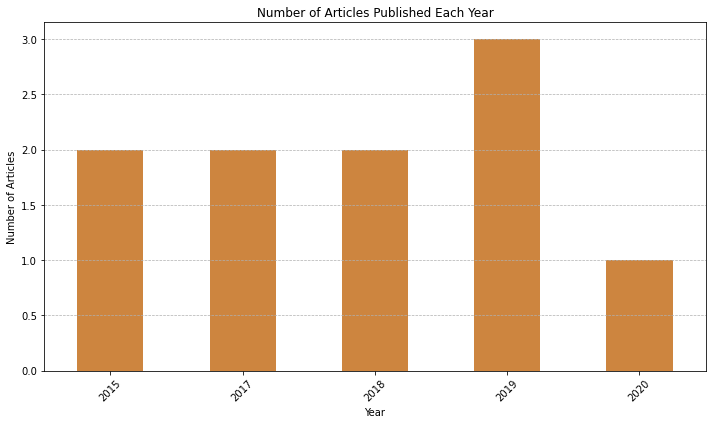

In [59]:
import matplotlib.pyplot as plt
import pandas as pd


# Handle missing values by removing them
df1 = df1.dropna(subset=['Publication_year'])

# Convert 'Publication_year' to integer
df1['Publication_year'] = df1['Publication_year'].astype(int)

# Filter out the placeholder year if it exists
df1 = df1[df1['Publication_year'] > 0]

# Group the data by 'Publication_year' and count the number of articles per year
articles_per_year = df.groupby('Publication_year').size()

# Plot the number of articles published each year, excluding year 0
plt.figure(figsize=(10, 6))
articles_per_year.plot(kind='bar', color='#cd853f')
plt.title('Number of Articles Published Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


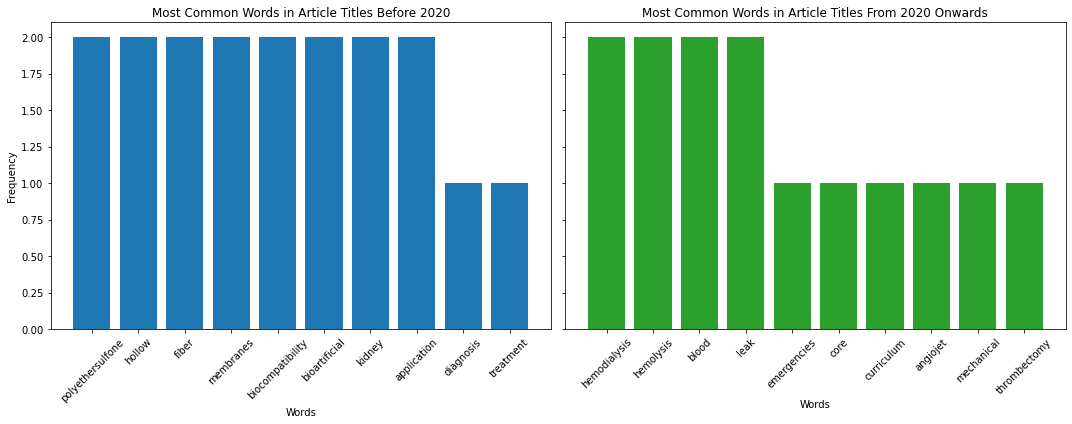

([('polyethersulfone', 2),
  ('hollow', 2),
  ('fiber', 2),
  ('membranes', 2),
  ('biocompatibility', 2),
  ('bioartificial', 2),
  ('kidney', 2),
  ('application', 2),
  ('diagnosis', 1),
  ('treatment', 1)],
 [('hemodialysis', 2),
  ('hemolysis', 2),
  ('blood', 2),
  ('leak', 2),
  ('emergencies', 1),
  ('core', 1),
  ('curriculum', 1),
  ('angiojet', 1),
  ('mechanical', 1),
  ('thrombectomy', 1)])

In [60]:
import re
from collections import Counter
import matplotlib.pyplot as plt

# Manually define a small set of common English stop words
stop_words = set(["the", "and", "of", "in", "to", "a", "with", "for", "on", "is", "an", "by", "from", "as", "at", "are", "that", "this", "which", "be", "or"])

def clean_tokenize(text):
    """ 
    Tokenize the text by converting to lowercase, removing non-alphabetic characters, 
    and splitting into words.
    """
    words = re.findall(r'\b[a-z]+\b', text.lower())
    return words

# Split the dataset into two time periods
before_2020_df = df1[df1['Publication_year'] < 2020]
from_2020_onwards_df = df1[df1['Publication_year'] >= 2020]

# Tokenize the titles and remove stop words for each period
tokens_before_2020 = [word for title in before_2020_df['Title'] for word in clean_tokenize(title) if word not in stop_words]
tokens_from_2020_onwards = [word for title in from_2020_onwards_df['Title'] for word in clean_tokenize(title) if word not in stop_words]

# Count the frequency of each word for each period
word_counts_before_2020 = Counter(tokens_before_2020)
word_counts_from_2020_onwards = Counter(tokens_from_2020_onwards)

# Get the most common words for each period
most_common_words_before_2020 = word_counts_before_2020.most_common(10)
most_common_words_from_2020_onwards = word_counts_from_2020_onwards.most_common(10)

# Plot the most common words for each period
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Before 2020
axes[0].bar(*zip(*most_common_words_before_2020), color='#1f77b4')
axes[0].set_title('Most Common Words in Article Titles Before 2020')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)

# From 2020 onwards
axes[1].bar(*zip(*most_common_words_from_2020_onwards), color='#2ca02c')
axes[1].set_title('Most Common Words in Article Titles From 2020 Onwards')
axes[1].set_xlabel('Words')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

(most_common_words_before_2020, most_common_words_from_2020_onwards)


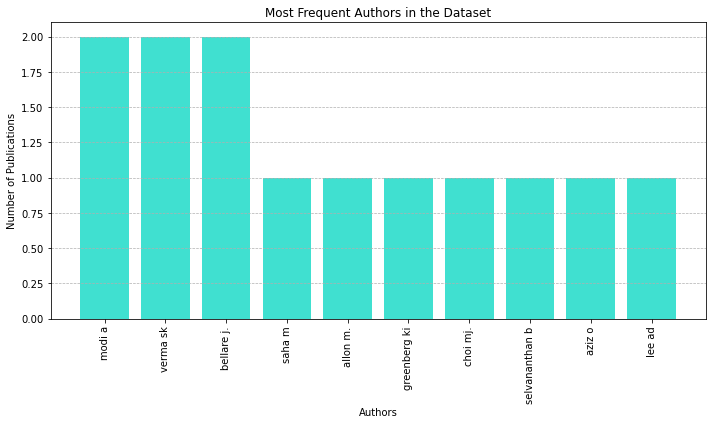

[('modi a', 2),
 ('verma sk', 2),
 ('bellare j.', 2),
 ('saha m', 1),
 ('allon m.', 1),
 ('greenberg ki', 1),
 ('choi mj.', 1),
 ('selvananthan b', 1),
 ('aziz o', 1),
 ('lee ad', 1)]

In [61]:
# Most frequent Authors

# Function to clean and split author names
def clean_split_authors(author_string):
    # Split author names by comma, assuming each author is separated by a comma
    authors = author_string.split(',')
    # Remove any leading/trailing whitespace from each author name
    authors = [author.strip() for author in authors]
    return authors

# Combine all authors into a single list
all_authors = []
for authors in df1['Authors'].dropna():
    all_authors.extend(clean_split_authors(authors))

# Count the occurrences of each author
author_counts = Counter(all_authors)

# Get the most common authors
most_common_authors = author_counts.most_common(10)

# Plot the most common authors
plt.figure(figsize=(10, 6))
plt.bar(*zip(*most_common_authors), color='#40e0d0')
plt.title('Most Frequent Authors in the Dataset')
plt.xlabel('Authors')
plt.ylabel('Number of Publications')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

# Return the most common authors and their counts
most_common_authors

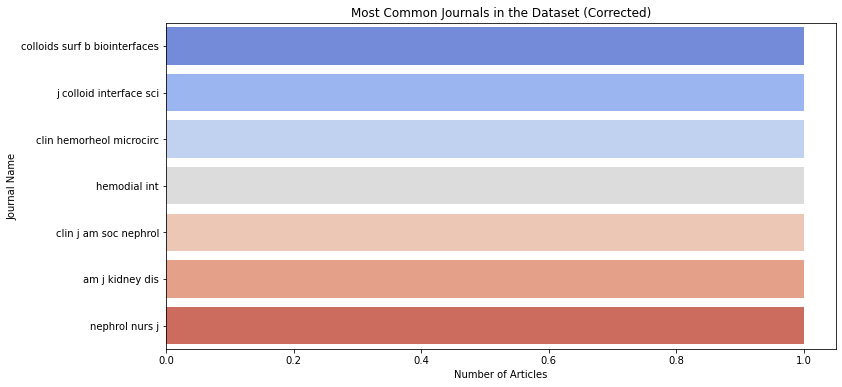

In [63]:
# Visualization to see the top ten journals

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Function to extract journal names more accurately
def extract_journal_name(text):
    # Check if the text is a string
    if isinstance(text, str):
        # Split by '.' and take the first part, which is likely the journal name
        return text.split('.')[0].strip()
    else:
        # Return a placeholder or NaN if the text is not a string
        return 'Unknown'  # or you can use: return np.nan

# Apply the function to extract journal names
df1['Extracted_Journal'] = df1['Journal'].apply(extract_journal_name)

# Counting the most common journals again
most_common_journals_corrected = df1['Extracted_Journal'].value_counts().head(10)

# Preparing data for corrected visualization
journal_names_corrected = most_common_journals_corrected.index
journal_counts_corrected = most_common_journals_corrected.values

# Creating a DataFrame for corrected visualization
journal_df_corrected = pd.DataFrame({'Journal': journal_names_corrected, 'Count': journal_counts_corrected})

# Corrected Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Journal', data=journal_df_corrected, palette="coolwarm")
plt.title('Most Common Journals in the Dataset (Corrected)')
plt.xlabel('Number of Articles')
plt.ylabel('Journal Name')
plt.show()


# Ventricular Assist Devices Analysis

In [64]:
import pandas as pd

# Path to the Excel file
file_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\FDA_Datasets\VAD.xlsx'

# Load the dataset
df3 = pd.read_excel(file_path)

# Print the first few rows of the DataFrame to confirm it's loaded correctly
print(df3.head())

                                               Title  \
0  3D bioprinted functional and contractile cardi...   
1  Comprehensive review of hemolysis in ventricul...   
2  Strain-based blood damage estimation for compu...   
3  Management of Hemostasis for Pediatric Patient...   
4  Flow features and device-induced blood trauma ...   

                                             Authors  \
0         Wang Z, Lee SJ, Cheng HJ, Yoo JJ, Atala A.   
1  Papanastasiou CA, Kyriakoulis KG, Theochari CA...   
2                      Gesenhues L, Pauli L, Behr M.   
3  Adachi I, Kostousov V, Hensch L, Chacon-Portil...   
4  Chen Z, Jena SK, Giridharan GA, Koenig SC, Sla...   

                         Journal            PMID  Publication_year  \
0                  Acta Biomater  PMID: 29452273            2018.0   
1                World J Cardiol  PMID: 32843935            2020.0   
2             Int J Artif Organs  PMID: 27079416            2016.0   
3            Semin Thromb Hemost  PMID: 291657

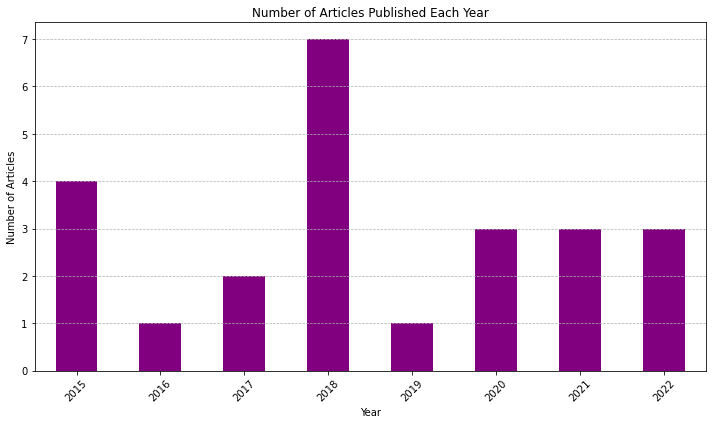

In [66]:
import matplotlib.pyplot as plt
import pandas as pd


# Handle missing values by removing them
df3 = df3.dropna(subset=['Publication_year'])

# Convert 'Publication_year' to integer
df3['Publication_year'] = df3['Publication_year'].astype(int)

# Filter out the placeholder year if it exists
df3 = df3[df3['Publication_year'] > 0]

# Group the data by 'Publication_year' and count the number of articles per year
articles_per_year = df3.groupby('Publication_year').size()

# Plot the number of articles published each year, excluding year 0
plt.figure(figsize=(10, 6))
articles_per_year.plot(kind='bar', color='purple')
plt.title('Number of Articles Published Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


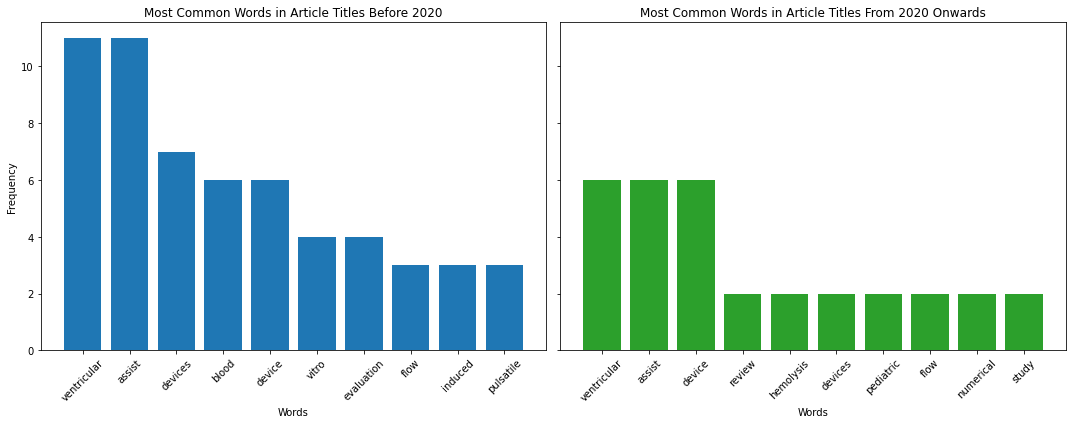

([('ventricular', 11),
  ('assist', 11),
  ('devices', 7),
  ('blood', 6),
  ('device', 6),
  ('vitro', 4),
  ('evaluation', 4),
  ('flow', 3),
  ('induced', 3),
  ('pulsatile', 3)],
 [('ventricular', 6),
  ('assist', 6),
  ('device', 6),
  ('review', 2),
  ('hemolysis', 2),
  ('devices', 2),
  ('pediatric', 2),
  ('flow', 2),
  ('numerical', 2),
  ('study', 2)])

In [67]:
import re
from collections import Counter
import matplotlib.pyplot as plt

# Manually define a small set of common English stop words
stop_words = set(["the", "and", "of", "in", "to", "a", "with", "for", "on", "is", "an", "by", "from", "as", "at", "are", "that", "this", "which", "be", "or"])

def clean_tokenize(text):
    """ 
    Tokenize the text by converting to lowercase, removing non-alphabetic characters, 
    and splitting into words.
    """
    words = re.findall(r'\b[a-z]+\b', text.lower())
    return words

# Split the dataset into two time periods
before_2020_df = df3[df3['Publication_year'] < 2020]
from_2020_onwards_df = df3[df3['Publication_year'] >= 2020]

# Tokenize the titles and remove stop words for each period
tokens_before_2020 = [word for title in before_2020_df['Title'] for word in clean_tokenize(title) if word not in stop_words]
tokens_from_2020_onwards = [word for title in from_2020_onwards_df['Title'] for word in clean_tokenize(title) if word not in stop_words]

# Count the frequency of each word for each period
word_counts_before_2020 = Counter(tokens_before_2020)
word_counts_from_2020_onwards = Counter(tokens_from_2020_onwards)

# Get the most common words for each period
most_common_words_before_2020 = word_counts_before_2020.most_common(10)
most_common_words_from_2020_onwards = word_counts_from_2020_onwards.most_common(10)

# Plot the most common words for each period
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Before 2020
axes[0].bar(*zip(*most_common_words_before_2020), color='#1f77b4')
axes[0].set_title('Most Common Words in Article Titles Before 2020')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)

# From 2020 onwards
axes[1].bar(*zip(*most_common_words_from_2020_onwards), color='#2ca02c')
axes[1].set_title('Most Common Words in Article Titles From 2020 Onwards')
axes[1].set_xlabel('Words')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

(most_common_words_before_2020, most_common_words_from_2020_onwards)


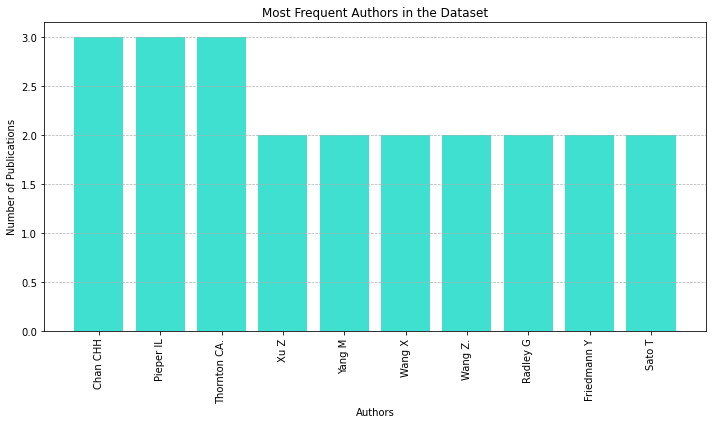

[('Chan CHH', 3),
 ('Pieper IL', 3),
 ('Thornton CA.', 3),
 ('Xu Z', 2),
 ('Yang M', 2),
 ('Wang X', 2),
 ('Wang Z.', 2),
 ('Radley G', 2),
 ('Friedmann Y', 2),
 ('Sato T', 2)]

In [68]:
# Most frequent Authors

# Function to clean and split author names
def clean_split_authors(author_string):
    # Split author names by comma, assuming each author is separated by a comma
    authors = author_string.split(',')
    # Remove any leading/trailing whitespace from each author name
    authors = [author.strip() for author in authors]
    return authors

# Combine all authors into a single list
all_authors = []
for authors in df3['Authors'].dropna():
    all_authors.extend(clean_split_authors(authors))

# Count the occurrences of each author
author_counts = Counter(all_authors)

# Get the most common authors
most_common_authors = author_counts.most_common(10)

# Plot the most common authors
plt.figure(figsize=(10, 6))
plt.bar(*zip(*most_common_authors), color='#40e0d0')
plt.title('Most Frequent Authors in the Dataset')
plt.xlabel('Authors')
plt.ylabel('Number of Publications')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

# Return the most common authors and their counts
most_common_authors

## Merging the Datasets Analysis(Medical Devices)

In [71]:
## Subset Datasets Analysis

import pandas as pd

# Define the file paths
dialyzer_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\FDA_Datasets\Dialyzer.xlsx'
endovascular_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\FDA_Datasets\Endovascular_grafts.xlsx'
heart_valves_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\FDA_Datasets\Heart_valves.xlsx'
ivc_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\FDA_Datasets\IVC.xlsx'
vad_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\FDA_Datasets\VAD.xlsx'

# Load the datasets
dialyzer_df = pd.read_excel(dialyzer_path)
endovascular_df = pd.read_excel(endovascular_path)
heart_valves_df = pd.read_excel(heart_valves_path)
ivc_df = pd.read_excel(ivc_path)
vad_df = pd.read_excel(vad_path)


# Combine all datasets
combined_df = pd.concat([dialyzer_df, endovascular_df, heart_valves_df, ivc_df, vad_df], ignore_index=True)



In [72]:
# Displaying the first few rows of the combined dataset
combined_df.head()

,Title,Authors,Journal,PMID,Publication_year,Affiliation_1,Affiliation_2,Affiliation_3,Affiliation_4,Affiliation_5,Affiliation_6,Affiliation_7,Affiliation_8,Affiliation_9,Affiliation_10
0,"Diagnosis, Treatment, and Prevention of Hemodi...","Saha M, Allon M.",Clin J Am Soc Nephrol,PMID: 27831511,2017.0,"Division of Nephrology, University of Alabama ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hemodialysis Emergencies: Core Curriculum 2021,"Greenberg KI, Choi MJ.",Am J Kidney Dis,PMID: 33771393,2021.0,"MedStar Georgetown University Hospital, Washin...","MedStar Georgetown University Hospital, Washin...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angiojet™ mechanical thrombectomy-induced hemo...,"Selvananthan B, Aziz O, Lee AD, Werner-Gibbing...",Hemodial Int,PMID: 36735589,2023.0,"Nepean Kidney Research Centre, Department of R...","Department of Vascular Surgery, Nepean Hospita...","Nepean Clinical School, Faculty of Medicine an...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hemolysis as Cause of Hemodialysis Blood Leak ...,"Jepson R, Hartlein M, Hauf LD, Garett-Golden C...",Nephrol Nurs J,PMID: 34286933,2021.0,"Regional Operations Director, DaVita Dialysis,...","Risk Manager, DaVita Inc., Denver, CO.","Director, Biomedical Services, DaVita Inc., De...","Clinical Manager, DaVita Hospital Services, Sa...","Chief Medical Officer, DaVita Hospital Service...","Chief Medical Officer, DaVita Kidney Care, Den...",NaN,NaN,NaN,NaN
4,Strategy for the hemocompatibility testing of ...,"Braune S, Basu S, Kratz K, Johansson JB, Reint...",Clin Hemorheol Microcirc,PMID: 27886001,2016.0,Institute of Biomaterial Science and Berlin-Br...,"Institute of Chemistry, University of Potsdam,...","Department for Cardiology, Charité Universität...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


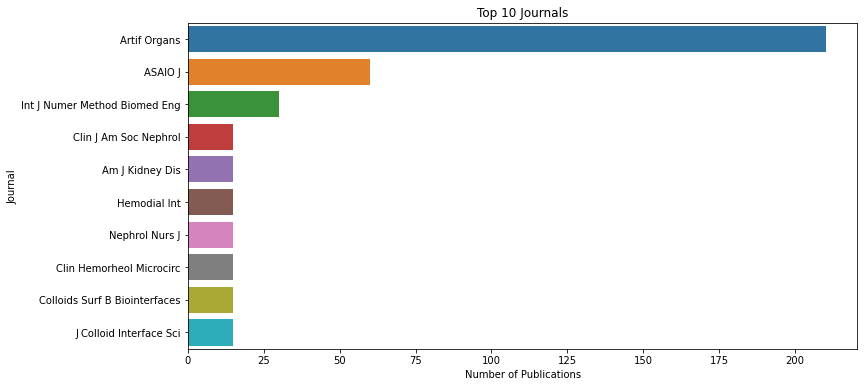

In [73]:

# Extract the 'Journal' column from each dataset, if it exists
journals = []
for dataset in combined_df:
    if 'Journal' in combined_df.columns:
        journals.extend(combined_df['Journal'].dropna().tolist())

# Clean the journal names to remove any dates or extraneous information
# Here we'll also account for variations of journal names that essentially refer to the same journal
cleaned_journals = [re.sub(r'\d{4}', '', journal).strip() for journal in journals]
cleaned_journals = [re.sub(r'Int J Artif Organs', 'Artif Organs', journal, flags=re.IGNORECASE).strip() for journal in cleaned_journals]

# Count the occurrences of each unique journal name
journal_counts = Counter(cleaned_journals)

# Get the most common journal names
most_common_journals = journal_counts.most_common(10)

# Convert the most common journals into a DataFrame for plotting
most_common_journals_df = pd.DataFrame(most_common_journals, columns=['Journal', 'Number of Publications'])

# Plot the top journals
plt.figure(figsize=(12, 6))
sns.barplot(x='Number of Publications', y='Journal', data=most_common_journals_df)
plt.title('Top 10 Journals')
plt.xlabel('Number of Publications')
plt.ylabel('Journal')
plt.show()


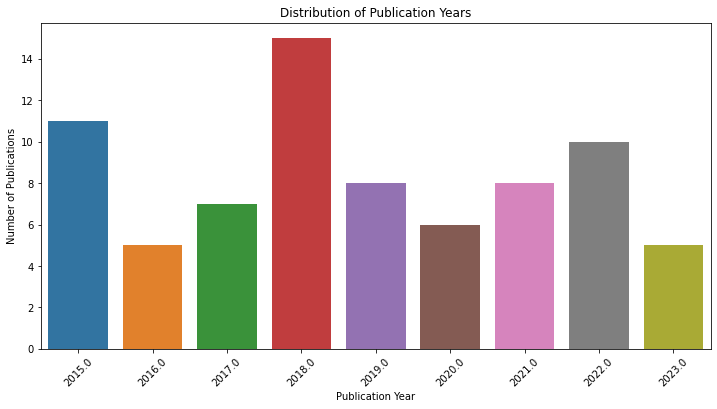

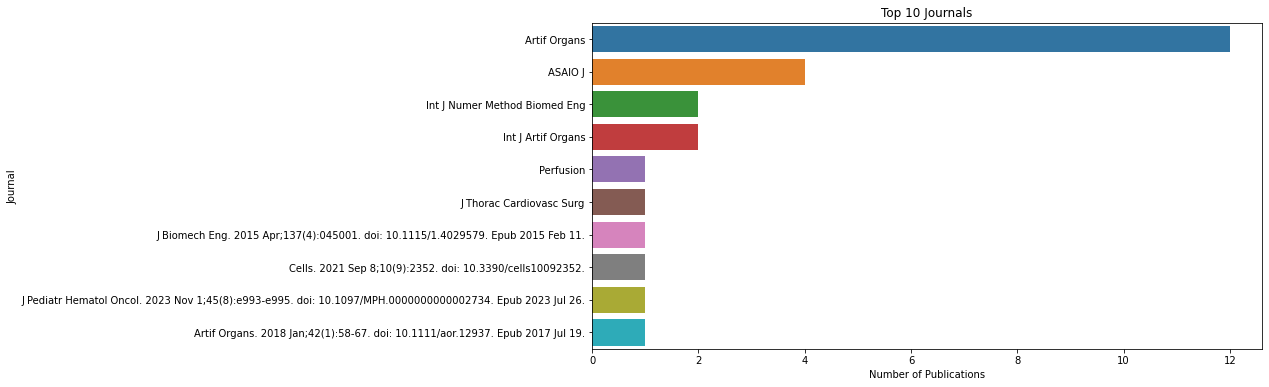

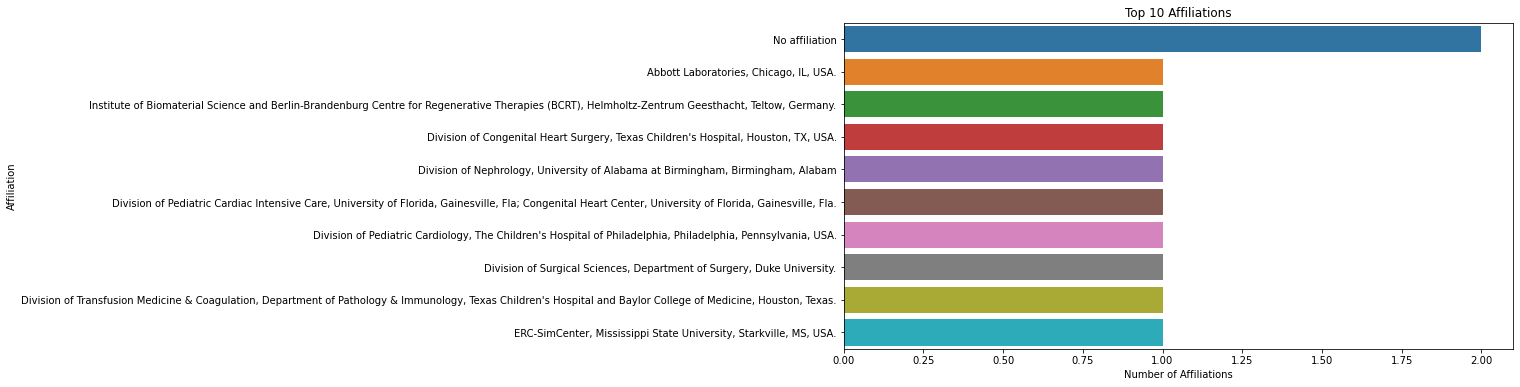

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows where 'Publication_year' is NaN since we cannot analyze those entries
df = combined_df.dropna(subset=['Publication_year'])

# Distribution of Publication Years
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Publication_year')
plt.title('Distribution of Publication Years')
plt.xlabel('Publication Year')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.show()

# Top Journals
top_journals = df['Journal'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_journals.values, y=top_journals.index)
plt.title('Top 10 Journals')
plt.xlabel('Number of Publications')
plt.ylabel('Journal')
plt.show()

# Top Affiliations
affiliation_columns = [f'Affiliation_{i}' for i in range(1, 11)]
top_affiliations = df[affiliation_columns].apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_affiliations.values, y=top_affiliations.index)
plt.title('Top 10 Affiliations')
plt.xlabel('Number of Affiliations')
plt.ylabel('Affiliation')
plt.show()


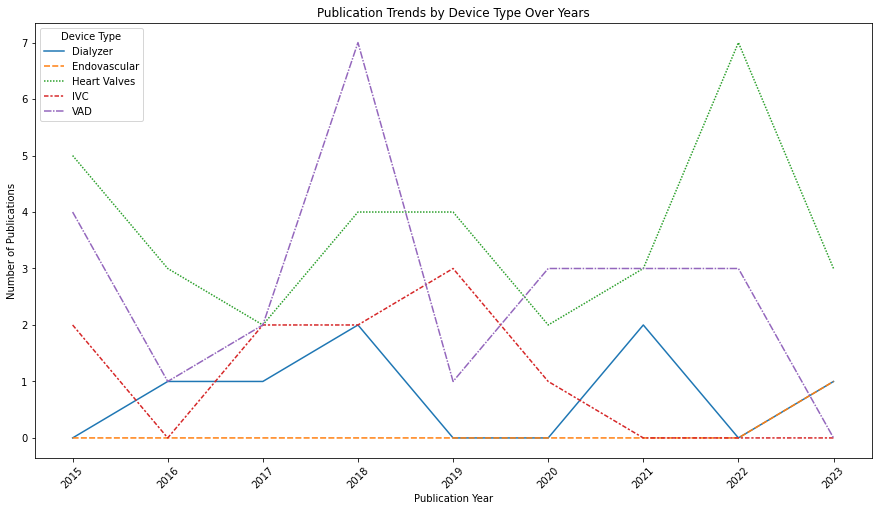

In [75]:
# Adding a 'Device Type' column to each dataframe before combining them
dialyzer_df['Device Type'] = 'Dialyzer'
endovascular_df['Device Type'] = 'Endovascular'
heart_valves_df['Device Type'] = 'Heart Valves'
ivc_df['Device Type'] = 'IVC'
vad_df['Device Type'] = 'VAD'

# Recombine the datasets with the new column
combined_df_with_type = pd.concat(
    [dialyzer_df, endovascular_df, heart_valves_df, ivc_df, vad_df], 
    ignore_index=True
)

# Drop rows with NaN in 'Publication_year' as we need this for our analysis
combined_df_with_type = combined_df_with_type.dropna(subset=['Publication_year'])

# Group by Device Type and Publication Year
grouped_df = combined_df_with_type.groupby(['Device Type', 'Publication_year']).size().reset_index(name='Publications')

# Pivot the data for easier plotting
pivot_df = grouped_df.pivot(index='Publication_year', columns='Device Type', values='Publications').fillna(0)

# Plotting
plt.figure(figsize=(15, 8))
sns.lineplot(data=pivot_df)
plt.title('Publication Trends by Device Type Over Years')
plt.xlabel('Publication Year')
plt.ylabel('Number of Publications')
plt.legend(title='Device Type', labels=pivot_df.columns)
plt.xticks(rotation=45)
plt.show()


In [76]:
from collections import Counter
import itertools

# Extracting authors and affiliations
authors_list = combined_df['Authors'].dropna().tolist()
#affiliations_list = combined_df[['Affiliation_1', 'Affiliation_2', 'Affiliation_3', 'Affiliation_4', 'Affiliation_5']].fillna('').values.tolist()

# Flattening the list of authors and affiliations
flat_authors = list(itertools.chain(*[author.split(",") for author in authors_list]))
#flat_affiliations = list(itertools.chain(*affiliations_list))

# Counting the occurrences of each author and institution
author_counts = Counter(flat_authors)
#institution_counts = Counter(flat_affiliations)

# Getting the most common authors and institutions
most_common_authors = author_counts.most_common(10)
#most_common_institutions = institution_counts.most_common(10)

most_common_authors,# most_common_institutions



([(' Dasi LP.', 3),
  (' Thornton CA.', 3),
  ('Modi A', 2),
  (' Verma SK', 2),
  (' Bellare J.', 2),
  ('Wang Z', 2),
  (' Azadani AN.', 2),
  (' Li J', 2),
  (' Wu Q', 2),
  (' Burgreen GW', 2)],)

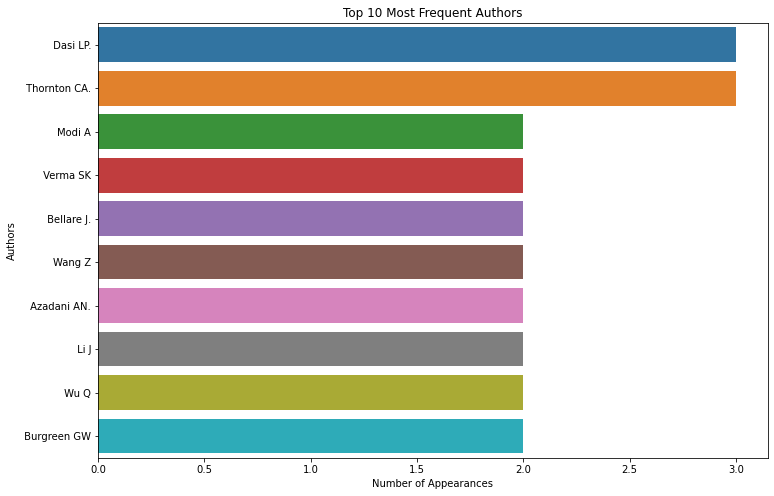

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Chart for Most Frequent Authors
author_names, author_counts = zip(*most_common_authors)

plt.figure(figsize=(12, 8))
sns.barplot(x=list(author_counts), y=list(author_names))
plt.title('Top 10 Most Frequent Authors')
plt.xlabel('Number of Appearances')
plt.ylabel('Authors')
plt.show()

In [78]:
def extract_countries(affiliation_column):
    """
    Extract countries from the affiliation column and return a list of countries.
    """
    countries = []

    for item in affiliation_column:
        if pd.isna(item):
            continue
        # Extracting the country from the affiliation string
        # This is a simple extraction based on common patterns and may not be exhaustive
        country = re.split(r',', item)[-1]  # Taking the last part of the affiliation as the country
        countries.append(country.strip())

    return countries

# Extracting countries from all affiliation columns
countries = []
for i in range(1, 11):  # There are 10 affiliation columns
    column_name = f'Affiliation_{i}'
    countries.extend(extract_countries(combined_df[column_name]))

# Counting the occurrences of each country
country_counts = Counter(countries)

# Identifying emerging countries based on recent publications
recent_df = combined_df[combined_df['Publication_year'] >= 2020]  # Considering publications from 2020 onwards

recent_countries = []
for i in range(1, 11):
    column_name = f'Affiliation_{i}'
    recent_countries.extend(extract_countries(recent_df[column_name]))

recent_country_counts = Counter(recent_countries)

# Getting the top 5 emerging countries
emerging_countries = recent_country_counts.most_common(5)
emerging_countries, country_counts.most_common(5)


([('USA.', 11),
  ('Turkey.', 6),
  ('China.', 5),
  ('India.', 5),
  ('Australia.', 5)],
 [('USA.', 36), ('China.', 15), ('Turkey.', 8), ('India.', 7), ('USA', 6)])

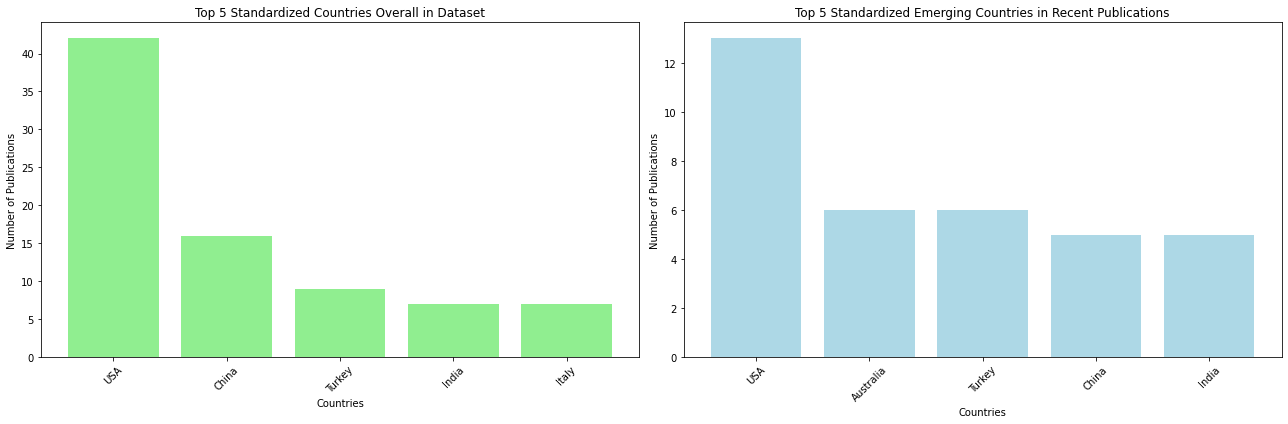

In [79]:
def standardize_country_name(country):
    """
    Standardize the country names by removing trailing periods and converting to a consistent format.
    """
    return country.rstrip('.').strip()

# Standardizing country names
standardized_countries = [standardize_country_name(country) for country in countries]
standardized_recent_countries = [standardize_country_name(country) for country in recent_countries]

# Recounting the occurrences of each standardized country
standardized_country_counts = Counter(standardized_countries)
standardized_recent_country_counts = Counter(standardized_recent_countries)

# Getting the top 5 standardized countries overall and in recent publications
standardized_top_countries = standardized_country_counts.most_common(5)
standardized_top_recent_countries = standardized_recent_country_counts.most_common(5)

# Separating the countries and their counts for plotting
std_countries_overall, std_counts_overall = zip(*standardized_top_countries)
std_countries_recent, std_counts_recent = zip(*standardized_top_recent_countries)

# Creating bar plots for the top standardized countries
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Overall top countries
axs[0].bar(std_countries_overall, std_counts_overall, color='lightgreen')
axs[0].set_title('Top 5 Standardized Countries Overall in Dataset')
axs[0].set_xlabel('Countries')
axs[0].set_ylabel('Number of Publications')
axs[0].tick_params(axis='x', rotation=45)

# Top countries in recent publications
axs[1].bar(std_countries_recent, std_counts_recent, color='lightblue')
axs[1].set_title('Top 5 Standardized Emerging Countries in Recent Publications')
axs[1].set_xlabel('Countries')
axs[1].set_ylabel('Number of Publications')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [80]:
def extract_full_usa_institutions(affiliation_column):
    """
    Extract more complete institution names from the affiliation column that are located in the USA.
    """
    usa_institutions = []

    for item in affiliation_column:
        if pd.isna(item):
            continue

        # Checking if the affiliation is in the USA
        if 'USA' in item or 'United States' in item:
            # Attempt to capture the full institution name including location
            parts = item.split(',')
            institution = ', '.join(parts[:-1]).strip()  # Excluding the country part
            usa_institutions.append(institution)

    return Counter(usa_institutions)

# Extracting and counting more complete USA institutions from all affiliation columns
full_usa_institution_counts = Counter()
for i in range(1, 11):  # There are 10 affiliation columns
    column_name = f'Affiliation_{i}'
    full_usa_institution_counts.update(extract_full_usa_institutions(combined_df[column_name]))

# Getting the top 10 most common full USA institutions
most_common_full_usa_institutions = full_usa_institution_counts.most_common(10)
most_common_full_usa_institutions


[('Biomedical Acoustics Research Laboratory,  University of Central Florida,  4000 Central Florida Blvd,  Orlando,  FL 32816',
  4),
 ('Cardiac Ultrasound Laboratory,  Massachusetts General Hospital,  Harvard Medical School,  55 Fruit Street,  Yawkey 5B,  Boston,  MA,  02114',
  2),
 ('Department of Biomedical Engineering,  The Ohio State University,  473W 12th Ave.,  Columbus,  OH,  43210',
  2),
 ('Cardiac Biomechanics Laboratory,  Department of Mechanical and Materials Engineering,  University of Denver,  2390 S. York St. #200,  Denver,  CO,  80210',
  2),
 ('Wake Forest Institute for Regenerative Medicine,  Wake Forest School of Medicine,  Medical Center Boulevard,  Winston-Salem,  NC 27157',
  2),
 ('Minneapolis Heart Institute at Abbott Northwestern Hospital', 1),
 ('Department of Chemical,  Biological and Materials Engineering,  University of Oklahoma,  Norman,  OK 73019',
  1),
 ('Division of Cardiology,  Department of Internal Medicine University of Alabama,  Birmingham',
  1)

In [81]:
def extract_usa_affiliations_only(affiliation_column):
    """
    Extract institution names from the affiliation column that are located in the USA.
    """
    usa_affiliations = set()

    for item in affiliation_column:
        if pd.isna(item):
            continue

        # Checking if the affiliation is in the USA
        if 'USA' in item or 'United States' in item:
            # Attempt to capture the full institution name including location
            parts = item.split(',')
            institution = ', '.join(parts[:-1]).strip()  # Excluding the country part
            usa_affiliations.add(institution)

    return usa_affiliations

# Extracting USA affiliations from all affiliation columns
usa_affiliations_set = set()
for i in range(1, 11):  # There are 10 affiliation columns
    column_name = f'Affiliation_{i}'
    usa_affiliations_set.update(extract_usa_affiliations_only(combined_df[column_name]))
    

# Converting the set of USA affiliations to a DataFrame
usa_affiliations_df = pd.DataFrame(sorted(usa_affiliations_set), columns=['USA Affiliations'])
usa_affiliations_df.head(20)  # Displaying the first few rows of the DataFrame

# Increase the display options to show more content in each row
pd.set_option('display.max_colwidth', None)
# Displaying the first 20 rows of the DataFrame with full affiliation names
usa_affiliations_df.head(20)

,USA Affiliations
0,"Abbott Laboratories, Chicago, IL"
1,"BioCirc Research Laboratory, School of Biomedical Engineering, Science, and Health Systems, Drexel University, Philadelphia, Pennsylvania"
2,"Biomedical Acoustics Research Laboratory, University of Central Florida, 4000 Central Florida Blvd, Orlando, FL 32816"
3,"Cardiac Biomechanics Laboratory, Department of Mechanical and Materials Engineering, University of Denver, 2390 S. York St. #200, Denver, CO, 80210"
4,"Cardiac Ultrasound Laboratory, Massachusetts General Hospital, Harvard Medical School, 55 Fruit Street, Yawkey 5B, Boston, MA, 02114"
5,"Cardiothoracic Surgery, Crozer-Chester Medical Center, Upland"
6,"Cardiovascular Surgery Research Laboratories, Texas Heart Institute, Houston, TX"
7,"Center for Devices and Radiological Health, U.S. Food and Drug Administration, Silver Spring, Maryland"
8,"College of Medicine, St. Christopher's Hospital for Children, Drexel University, Philadelphia, Pennsylvania"
9,"College of Medicine, University of Central Florida, 6850 Lake Nona Blvd, Orlando, FL 32827"


In [83]:

# Function to extract and format the full name and location of the institution from an affiliation string
def extract_and_format_institution(affiliation):
    if pd.isna(affiliation) or 'USA' not in affiliation:
        return None
    # Remove any potential email addresses and unnecessary white spaces
    affiliation = re.sub(r'\S+@\S+', '', affiliation).strip()
    # Remove USA and split the string by commas
    parts = affiliation.replace('USA', '').split(',')
    # Re-join the parts to form the full institution name and location
    formatted_institution = ', '.join([part.strip() for part in parts if part.strip()])
    # Add USA at the end
    return formatted_institution + ', USA'

# Apply the function to all the affiliation columns in the combined dataframe
all_institutions = []
for i in range(1, 11):
    column_name = f'Affiliation_{i}'
    if column_name in combined_df.columns:
        these_institutions = combined_df[column_name].apply(extract_and_format_institution)
        all_institutions.extend([inst for inst in these_institutions if inst])

# Count the occurrences of each institution
institution_counts = Counter(all_institutions)

# Get the most common institutions
most_common_institutions = institution_counts.most_common(10)
most_common_institutions


# Convert the most common institutions into a DataFrame for display as a table
most_common_institutions_df = pd.DataFrame(most_common_institutions, columns=['Institution', 'Occurrences'])
most_common_institutions_df

,Institution,Occurrences
0,"Biomedical Acoustics Research Laboratory, University of Central Florida, 4000 Central Florida Blvd, Orlando, FL 32816, ., USA",4
1,"Cardiac Biomechanics Laboratory, Department of Mechanical and Materials Engineering, University of Denver, 2390 S. York St. #200, Denver, CO, 80210, ., USA",2
2,"Department of Chemical, Biological and Materials Engineering, University of Oklahoma, Norman, OK 73019, ., USA",1
3,"Division of Cardiology, Department of Internal Medicine University of Alabama, Birmingham, ., USA",1
4,"Cardiac Ultrasound Laboratory, Massachusetts General Hospital, Harvard Medical School, 55 Fruit Street, Yawkey 5B, Boston, MA, 02114, USA",1
5,"Department of Biomedical Engineering, The Ohio State University, 473W 12th Ave., Columbus, OH, 43210, USA",1
6,"Simulation Innovation and Modeling Center (SIMCenter), The Ohio State University, Columbus, OH, ., USA",1
7,"Department of Aerospace Engineering, Auburn University, Auburn, AL, ., USA",1
8,"Department of Mechanical and Materials Engineering, University of Denver, Denver, CO, ., USA",1
9,"Internal Medicine, Crozer-Chester Medical Center, Upland, ., USA",1


In [82]:
import networkx as nx

# Creating a graph
G = nx.Graph()

# Adding nodes and edges to the graph based on co-authorship
for authors in authors_list:
    authors_split = [author.strip() for author in authors.split(",")]
    for author in authors_split:
        G.add_node(author)
    for author_pair in itertools.combinations(authors_split, 2):
        G.add_edge(*author_pair)

# Identifying key nodes (authors) in the network
# Degree centrality: Nodes with higher degree centrality are more 'central' in the network
degree_centrality = nx.degree_centrality(G)
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Extracting top 10 central authors in the network
top_10_central_authors = sorted_degree_centrality[:10]

top_10_central_authors


[('Chan CHH', 0.048913043478260865),
 ('Wu Q', 0.043478260869565216),
 ('Chen Z', 0.043478260869565216),
 ('Sato T', 0.043478260869565216),
 ('Li J', 0.04076086956521739),
 ('Pieper IL', 0.04076086956521739),
 ('Thornton CA.', 0.04076086956521739),
 ('Seguchi O', 0.03804347826086957),
 ('Saito K', 0.03804347826086957),
 ('Fukuma K', 0.03804347826086957)]

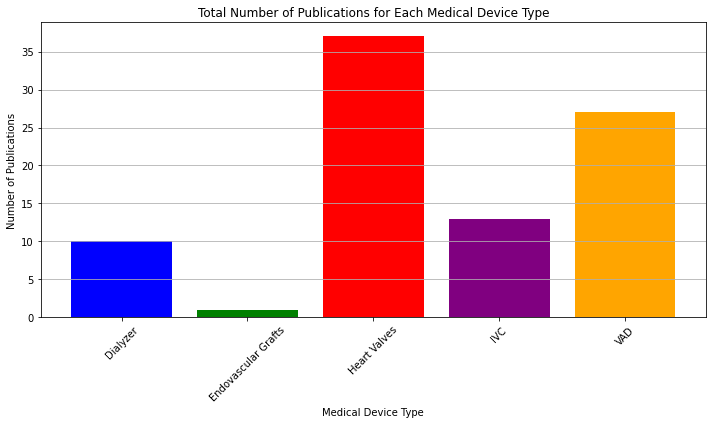

In [85]:
# Counting the total number of publications for each device type
total_publications = {
    'Dialyzer': len(dialyzer_df),
    'Endovascular Grafts': len(endovascular_df),
    'Heart Valves': len(heart_valves_df),
    'IVC': len(ivc_df),
    'VAD': len(vad_df)
}

# Creating a bar chart for the total number of publications
plt.figure(figsize=(10, 6))
plt.bar(total_publications.keys(), total_publications.values(), color=['blue', 'green', 'red', 'purple', 'orange'])

plt.title('Total Number of Publications for Each Medical Device Type')
plt.xlabel('Medical Device Type')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Showing the bar chart
plt.show()


In [98]:

import pandas as pd

# Define the file paths
dialyzer_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\FDA_Datasets\Dialyzer.xlsx'
endovascular_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\FDA_Datasets\Endovascular_grafts.xlsx'
heart_valves_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\FDA_Datasets\Heart_valves.xlsx'
ivc_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\FDA_Datasets\IVC.xlsx'
vad_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\FDA_Datasets\VAD.xlsx'

# Load the datasets
dialyzer_df = pd.read_excel(dialyzer_path)
endovascular_df = pd.read_excel(endovascular_path)
heart_valves_df = pd.read_excel(heart_valves_path)
ivc_df = pd.read_excel(ivc_path)
vad_df = pd.read_excel(vad_path)


# Combine all datasets
combined_df = pd.concat([dialyzer_df, endovascular_df, heart_valves_df, ivc_df, vad_df], ignore_index=True)


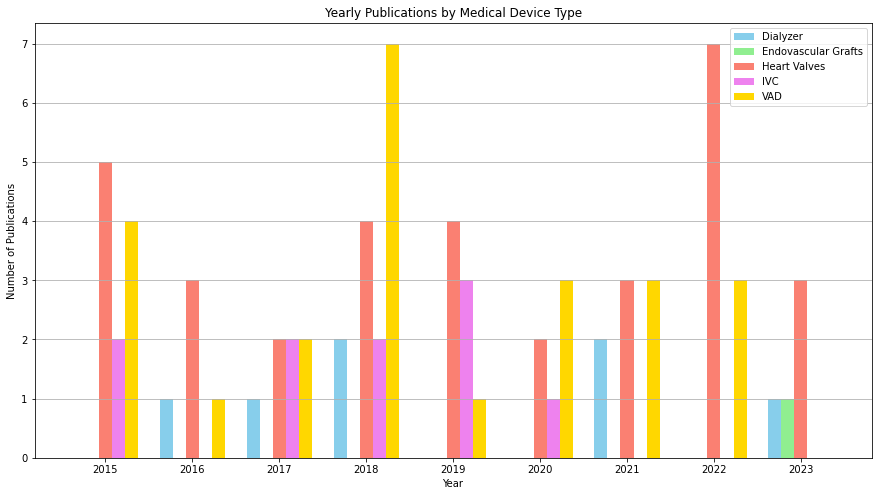

In [99]:
# Creating a grouped bar chart for each year

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Aggregating the data to count the number of publications per year for each device type
dialyzer_yearly = dialyzer_df['Publication_year'].value_counts().sort_index()
endovascular_yearly = endovascular_df['Publication_year'].value_counts().sort_index()
heart_valves_yearly = heart_valves_df['Publication_year'].value_counts().sort_index()
ivc_yearly = ivc_df['Publication_year'].value_counts().sort_index()
vad_yearly = vad_df['Publication_year'].value_counts().sort_index()

# Creating a new dataframe to combine these counts
combined_publications_per_year = pd.DataFrame({
    'Dialyzer': dialyzer_yearly,
    'Endovascular Grafts': endovascular_yearly,
    'Heart Valves': heart_valves_yearly,
    'IVC': ivc_yearly,
    'VAD': vad_yearly
}).fillna(0) # Filling missing values with 0

# Extracting years and counts for each device type from the combined dataframe
years = combined_publications_per_year.index.astype(int)
dialyzer_counts = combined_publications_per_year['Dialyzer'].values
endovascular_counts = combined_publications_per_year['Endovascular Grafts'].values
heart_valves_counts = combined_publications_per_year['Heart Valves'].values
ivc_counts = combined_publications_per_year['IVC'].values
vad_counts = combined_publications_per_year['VAD'].values

# Setting the positions for the bars
bar_width = 0.15
positions = np.arange(len(years))

# Define appealing colors
colors = ['skyblue', 'lightgreen', 'salmon', 'violet', 'gold']

# Creating the grouped bar chart with appealing colors
plt.figure(figsize=(15, 8))
plt.bar(positions - bar_width*2, dialyzer_counts, bar_width, label='Dialyzer', color=colors[0])
plt.bar(positions - bar_width, endovascular_counts, bar_width, label='Endovascular Grafts', color=colors[1])
plt.bar(positions, heart_valves_counts, bar_width, label='Heart Valves', color=colors[2])
plt.bar(positions + bar_width, ivc_counts, bar_width, label='IVC', color=colors[3])
plt.bar(positions + bar_width*2, vad_counts, bar_width, label='VAD', color=colors[4])

plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.title('Yearly Publications by Medical Device Type')
plt.xticks(positions, years)
plt.legend()
plt.grid(axis='y')

# Showing the plot
plt.show()


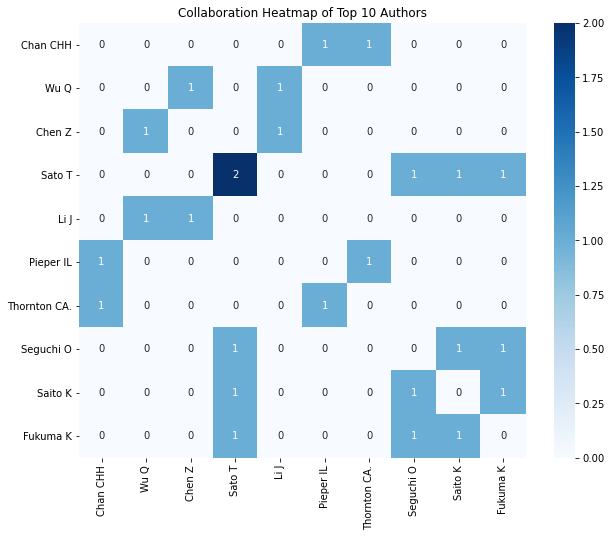

In [100]:
import pandas as pd
import networkx as nx
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt


# Function to process authors and add them to the network
def add_authors_to_network(df, graph):
    for authors in df['Authors'].dropna():
        author_list = [author.strip() for author in authors.split(',')]
        for author in author_list:
            if author not in graph:
                graph.add_node(author)
        for author_pair in combinations(author_list, 2):
            if graph.has_edge(*author_pair):
                graph[author_pair[0]][author_pair[1]]['weight'] += 1
            else:
                graph.add_edge(author_pair[0], author_pair[1], weight=1)

# Creating the co-authorship graph
co_authorship_graph = nx.Graph()
add_authors_to_network(combined_df, co_authorship_graph)

# Identifying the top 10 authors
degrees = dict(co_authorship_graph.degree())
sorted_authors = sorted(degrees, key=degrees.get, reverse=True)
top_10_authors = sorted_authors[:10]

# Creating a matrix for the top 10 authors
collaboration_matrix = pd.DataFrame(0, index=top_10_authors, columns=top_10_authors)
for author1, author2 in co_authorship_graph.subgraph(top_10_authors).edges():
    collaboration_matrix.at[author1, author2] += 1
    collaboration_matrix.at[author2, author1] += 1

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(collaboration_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Collaboration Heatmap of Top 10 Authors')
plt.show()


## Conclusion

In conclusion, this innovative project utilized Python for web scraping and data analysis, focusing on a comprehensive examination of cardiovascular regulatory science publications. Its primary aim was to pinpoint pivotal studies and forge connections with potential collaborators. The project successfully met its objectives by identifying critical trends and gaps in medical device research, thereby deepening the understanding of the cardiovascular implant research domain.

The significance of this endeavor extends beyond academic circles, offering substantial benefits to the general population. By guiding medical device research, this project paves the way for enhancements in healthcare and patient care. Additionally, it contributes significantly to the field of cardiovascular regulatory science.

The product itself is a testament to the project's thoroughness and precision. It encompasses a variety of visualizations, including line graphs, bar charts, word clouds, network graphs, scatter plots, and maps, all of which illuminate trends in publications and pinpoint research gaps. This not only aids in the dissemination of complex data in an accessible format but also underscores the project's commitment to advancing the field of cardiovascular research.

## ## Sources

Breuss, Martin. "Beautiful Soup: Build a Web Scraper With Python." Real Python, https://realpython.com/beautiful-soup-web-scraper-python/.
Driscoll, Kerry. "Web Scraping MLB Stats with Python and Beautiful Soup." Codecademy, https://www.codecademy.com/resources/blog/web-scraping-python-beautiful-soup-mlb-stats/, 26 April 2019.
Iapalucci, Michael J. "Mapping LECs from FCC Form 499 Data." Michael Iapalucci's Blog, https://mikeiapalucci.com/FCC-499-choropleth-map.html#FCC-499-choropleth-map, Posted on Sun 15 August 2021 in Jupyter Notebook format.
Leung, Nicole. "Web Scraping Demo: A Practical Demonstration." Capstone Project, September 22, 2023.
Mayank, Mohit. "Visualizing Networks in Python." Towards Data Science, https://towardsdatascience.com/visualizing-networks-in-python-d70f4cbeb259, 26 January 2021.
Vu, Duong. "Generating WordClouds in Python." DataCamp, https://www.datacamp.com/tutorial/wordcloud-python, February 2023.
"Choropleth Maps in Python." Plotly, https://plotly.com/python/choropleth-maps/.
